In [26]:
import pandas as pd
import matplotlib.pyplot as plt
from matplotlib import cm
from matplotlib.colors import Normalize
import numpy as np

In [27]:
with open("data_HW2.csv", "r") as data:
    datos = data.readlines()
    data.close()
datos = [x.strip() for x in datos]
datos

['x,y',
 '-5.062680965586749959e-01,-4.256756647965772022e-01',
 '-9.744345294228942134e-01,7.742295262316751803e-01',
 '-9.204234103976232095e-01,4.501124122366629843e-01',
 '-4.164251044979083716e-03,-6.371111781295005771e-01',
 '8.860600429983311876e-01,4.029323677072521592e-01',
 '-7.416951700269247549e-01,-3.249095917698183178e-02',
 '6.130713154999112291e-01,-1.090313015082913783e-01',
 '-5.923206696592275833e-02,-3.926476120764466060e-01',
 '6.952090079013648616e-01,1.613453573706427613e-01',
 '2.774790329587701887e-01,-4.299971102309542159e-01',
 '-7.447727571225120080e-01,1.153858107755066642e-01',
 '-4.244934610173514145e-01,-2.139057781608896258e-01',
 '4.437033743799179142e-01,-6.248711306823234723e-02',
 '-9.719575775497384384e-01,5.200987729345255550e-01',
 '2.215065862683143205e-01,-4.682580074197810749e-01',
 '-8.547410398975407997e-01,5.916225254758372687e-01',
 '-6.053800526571604390e-01,-3.911088525428890045e-02',
 '-9.808727862786366103e-01,7.437853061783140651e-01'

In [28]:
df_datos = pd.DataFrame(datos, columns=['Datos'])
df_datos

,Datos
0,"x,y"
1,"-5.062680965586749959e-01,-4.25675664796577202..."
2,"-9.744345294228942134e-01,7.742295262316751803..."
3,"-9.204234103976232095e-01,4.501124122366629843..."
4,"-4.164251044979083716e-03,-6.37111178129500577..."
...,...
996,"-1.804048627098466806e-01,-4.66099707057296530..."
997,"-8.441654608275948046e-01,2.037836395805847634..."
998,"7.846599218879062310e-01,3.404313313809324004e-01"
999,"4.541736818521582286e-01,4.630698550668388425e-03"


a) Considere la función f (x, y) = x sin(πy) + x2 + y2. Realice sus gráficos 3D y de contorno para (x, y) ∈ [−1, 1] ×[−1, 1]. Para este último muestre al menos 20 niveles. A primera vista, ¿cerca de qué puntos podemos encontrar mínimos locales?

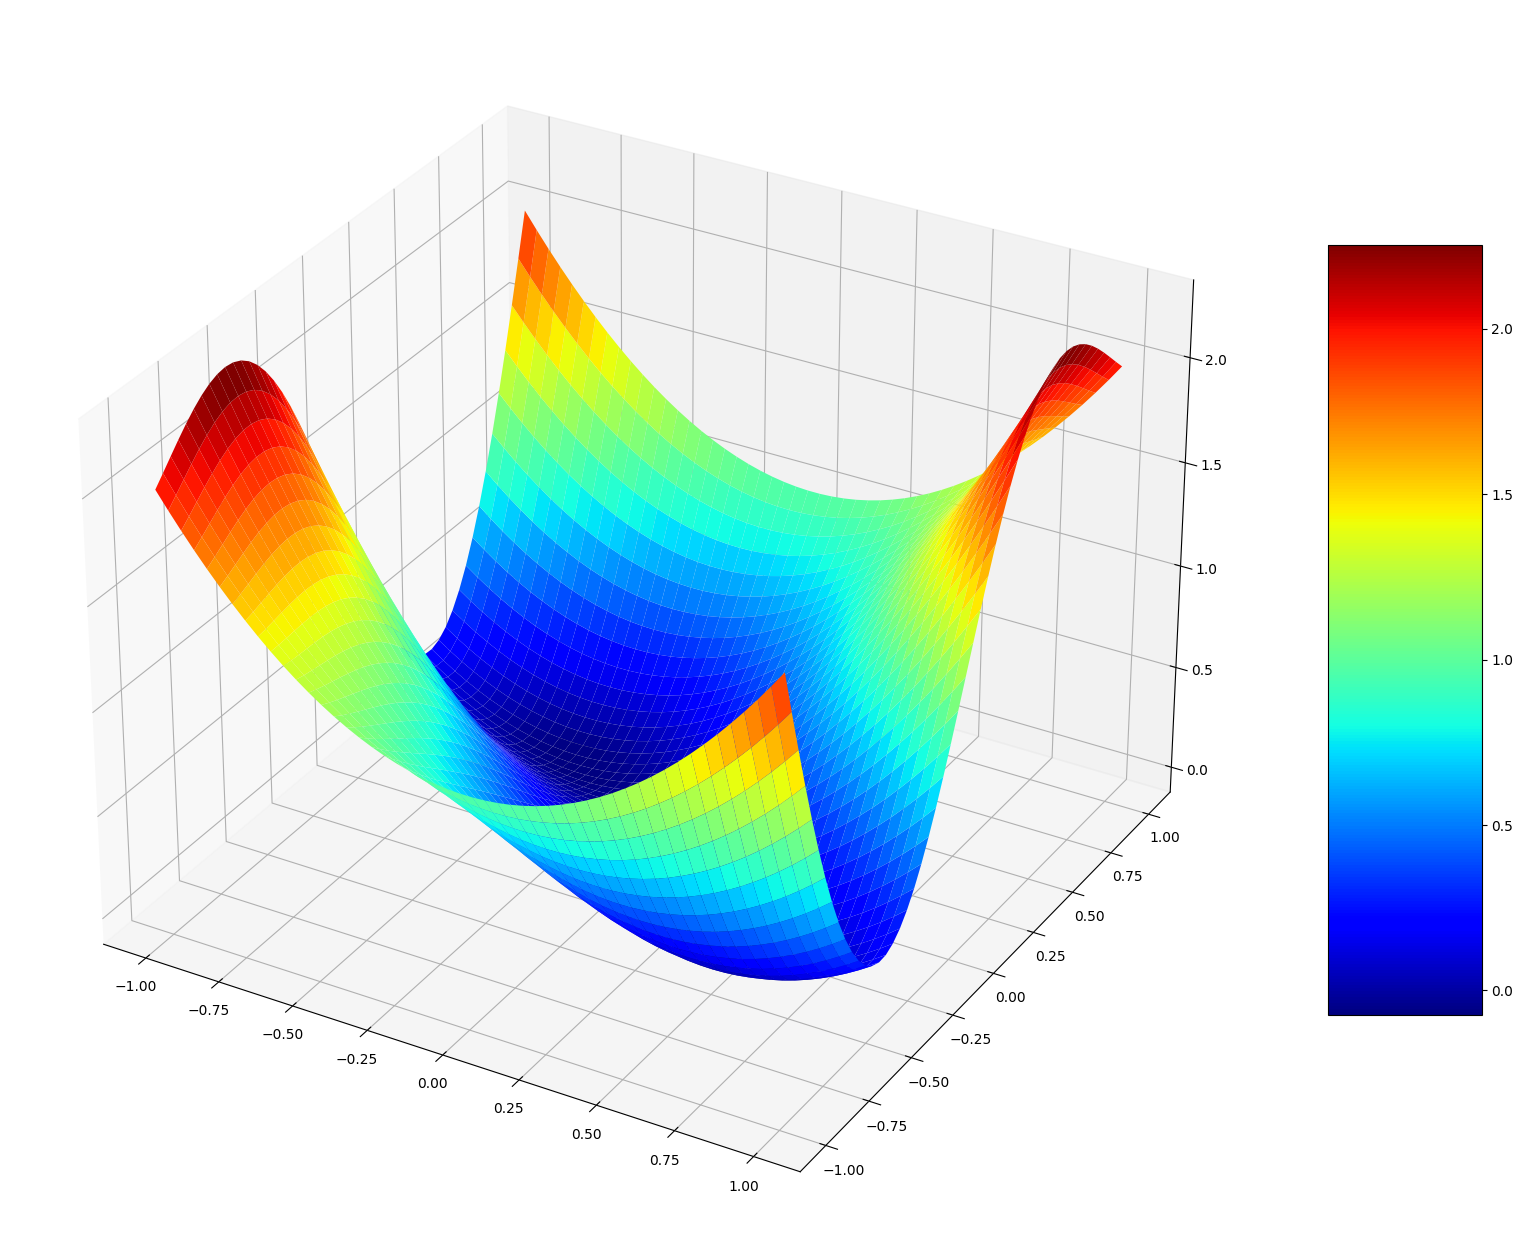

In [29]:
dom = np.linspace(-1, 1)
xx, yy = np.meshgrid(dom, dom)
f = lambda x, y: x*np.sin(np.pi*y)+x**2+y**2
fig, ax = plt.subplots(figsize=(20, 20), subplot_kw={'projection': '3d'})
surf = ax.plot_surface(xx, yy, f(xx, yy), antialiased=True, cmap="jet")
fig.colorbar(surf, shrink=0.5, aspect=5)
plt.show()

Utilizando la librería matplotlib y geogebra, al ojo se logra apreciar que el mínimo local es #Introducir mínimo local#

b) Programe el método de descenso de gradiente (Algoritmo 2) para la función f presentada anteriormente, con criterio de parada ‖xk+1 −xk‖2 ≤ 10^−12. Corra este algoritmo con puntos iniciales x0 = (1/2, −3/4)>^T, y x0 = (3/4, 0)>^T para tamaños de pasos ηk = 1/k para k ≥ 1. Reporte el número de pasos requeridos para cada punto inicial en alcanzar un mínimo local y grafique los puntos resultantes en el gráfico de contorno.

In [30]:
f = lambda x, y: x*np.sin(np.pi*y)+x**2+y**2

In [31]:
def gradiente_descendiente(x_k, epsilon = (10**(-12))):
    steps = [x_k]
    delta = 1
    k = 1
    while delta > epsilon:
        x_k1 = x_k - 1/k*(np.array([2*x_k[0]+np.sin(np.pi*x_k[1]), np.pi*x_k[0]*np.cos(np.pi*x_k[1])+2*x_k[1]]))
        delta = np.linalg.norm(x_k1 - x_k)
        x_k = x_k1
        k += 1
        steps.append(x_k)
    return k, x_k, steps

In [32]:
x_0 = np.array([1/2, -3/4])
pasos, x_k1, fxparcial = gradiente_descendiente(x_0)
print("El número de pasos es: ", pasos)
print("El valor de x_k1 es: ", x_k1)
print("La gradiente es: ", np.array(fxparcial))

El número de pasos es:  86014
El valor de x_k1 es:  [ 0.43534711 -0.33633012]
La gradiente es:  [[ 0.5        -0.75      ]
 [ 0.20710678  1.86072073]
 [ 0.21186472 -0.29467354]
 ...
 [ 0.43534711 -0.33633012]
 [ 0.43534711 -0.33633012]
 [ 0.43534711 -0.33633012]]


In [33]:
x_0_2 = np.transpose(np.array([3/4, 0]))
pasos_2, x_k1_2, fxparcial_2 = gradiente_descendiente(x_0_2)
print("El número de pasos es: ", pasos_2)
print("El valor de x_k1 es: ", x_k1_2)
print("La gradiente es: ", np.array(fxparcial_2))

El número de pasos es:  140529
El valor de x_k1 es:  [-0.43534708  0.33633011]
La gradiente es:  [[ 0.75        0.        ]
 [-0.75       -2.35619449]
 [ 0.44983608  0.51431737]
 ...
 [-0.43534708  0.33633011]
 [-0.43534708  0.33633011]
 [-0.43534708  0.33633011]]


Para el punto (1/2, -3/4) se realizaron un total de 86.014 pasos, mientras que para el punto (3/4, 0) se realizaron un total de 140.529 pasos.

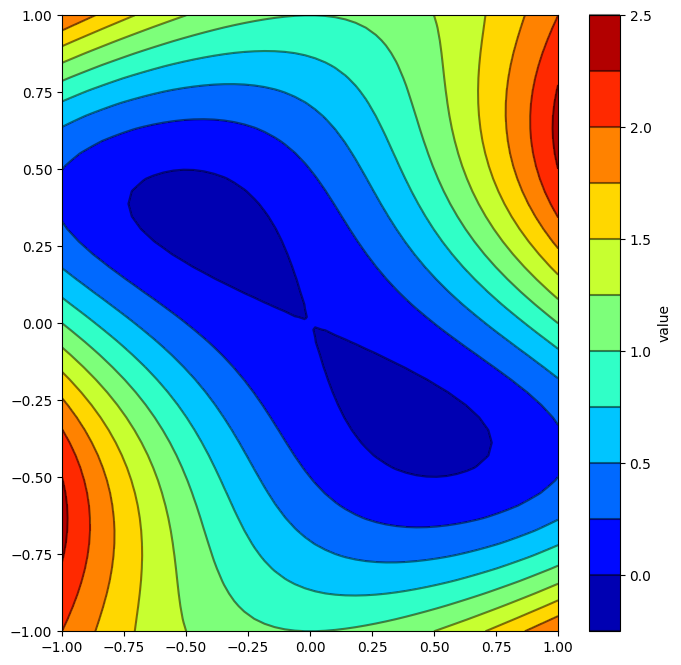

In [34]:
fig = plt.figure(figsize=(8, 8))

CS = plt.contourf(xx, yy, f(xx, yy), levels=10, cmap='jet')
cbar = fig.colorbar(CS, label='value')

CS2 = plt.contour(CS, levels=CS.levels[::1], colors='k', alpha=0.5)
cbar.add_lines(CS2)

plt.plot
plt.show()

In [35]:
def gradiente_descendiente_variada(x_k, epsilon = (10**(-12))):
    contador = 1
    steps = [x_k]
    delta = 1
    k = 1
    alpha = 0.5
    while delta > epsilon:
        if contador == 2:
            x_k1 = x_k - 1/k*(np.array([2*x_k[0]+np.sin(np.pi*x_k[1]), np.pi*x_k[0]*np.cos(np.pi*x_k[1])+2*x_k[1]])) + alpha*(x_k - x_k1)
            delta = np.linalg.norm(x_k1 - x_k)
            x_k = x_k1
            k += 1
            steps.append(x_k)
        x_k1 = x_k - 1/k*(np.array([2*x_k[0]+np.sin(np.pi*x_k[1]), np.pi*x_k[0]*np.cos(np.pi*x_k[1])+2*x_k[1]]))
        delta = np.linalg.norm(x_k1 - x_k)
        x_k = x_k1
        k += 1
        steps.append(x_k)
        contador += 1
    return k, x_k, steps

In [36]:
x_0 = np.array([1/2, -3/4])
pasos, x_k1, fxparcial = gradiente_descendiente_variada(x_0)
print("El número de pasos es: ", pasos)
print("El valor de x_k1 es: ", x_k1)
print("La gradiente es: ", np.array(fxparcial))

UnboundLocalError: cannot access local variable 'x_k1' where it is not associated with a value

In [ ]:
x_0_2 = np.transpose(np.array([3/4, 0]))
pasos_2, x_k1_2, fxparcial_2 = gradiente_descendiente_variada(x_0_2)
print("El número de pasos es: ", pasos_2)
print("El valor de x_k1 es: ", x_k1_2)
print("La gradiente es: ", np.array(fxparcial_2))